<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/Guia_rapido_v20230221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guia Rápido** 

___


Este capítulo é um guia rápido de operações em `Python` manipular de forma simples Séries Temporais. Empregue este capítulo apenas como um ***guia de consulta rápida***. Nele você vai encontrar um resumo de:

* Como manipular dados de datas e tempo com `Python`
* Como empregar Séries Temporais com o `Pandas`
* E transformações de dados importantes sobre Séries Temporais que serão empregadas e detalhadas nos capítulos seguintes.

Como um *guia* você não precisa ler este capítulo completamente e a maior parte dos conceitos envolvidos serão retomados nos capítulos seguintes. A rigor esse capítulo poderia estar até mesmo no final do livro. Mas recomendamos que você faça uma leitura diagonal e rápida apenas para se familiarizar com os comandos.  Nos próximos capítulos, quando surgirem, você entenderá melhor o uso dessas operações e certamente será útil você voltar neste *guia* quando precisar dessas operações.  Por esse motivo, optamos deixa-lo logo no início como um pequeno *mapa* para orientá-lo, e introduzimos as Séries Temporais somente a partir do próximo capítulo, onde de fato, vai começar sua jornada pelas Séries Temporais.

> **Introduzimos as Séries Temporais somente a partir do próximo capítulo, onde de fato, vai começar sua jornada pelas Séries Temporais.**

Você encontrará essas operações também no índice remissivo ao final do livro.

---





## Funções deste Livro
### `tspplot()`, `tspdisplay()`

Ao longo do livro você pode encontrar algumas funções `Python` criadas especificamente para este livro. Você pode identificar essas funções pelo nome pois todas iniciam por `tsp` (**t**ime **s**eries **p**ython). A única finalidade dessas funções é proporcionar uma alternativa mais econômica no texto (evitando várias linhas de código) e você poderá empregar igualmente as funções nativas do `Python` em substituição às funções desse livro sempre que desejar. Assim, quando usamos `tspplot()` ou  `tspdisplay()`, você pode empregar igualmente as funções `plot()` ou  `display()`. Tirando a economia de opções e aspectos de formatação empregados para edição do livro, os comandos têm o mesmo propósito e resultado.

In [1]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Rogerio-mack/Temporal/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [2]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [3]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

Outras funções `tsp` que acompanham este livro são apresentadas mais adiante.

## Trabalhando com Datas no Python
### `datetime`, `strftime`, `strptime`, `pd.to_datetime`

Ao trabalhar com séries temporais você pode se deparar com difícil tarefa de manipular informações de datas e horário. É frequente você obter dados como esses no formato de caracteres. Entretanto, a maior parte das operações sobre datas e horários, como obter o dia da semana, a quantidade de dias corridos entre duas datas, o nome do mês ou a data e hora corrente, só é possível empregando-se um formato interno de datas e tempo do `Python` que encontram-se no módulo `datetime`. 

In [4]:
from datetime import date, time, datetime

print( date(year=2023, month=1, day=31) )
# o mesmo que: print( date(2023, 1, 31) )
print( time(hour=17, minute=29, second=45) )
# o mesmo que: print( time(17, 29, 45) )
print( datetime(year=2023, month=1, day=31, hour=17, minute=29, second=45) )
# o mesmo que: print( datetime(2023, 1, 31, 17, 29, 45) )
print( datetime.now() )


2023-01-31
17:29:45
2023-01-31 17:29:45
2023-02-21 18:53:44.374053


### Strings para Datas e Datas para Strings

Assim, uma tarefa comum é você precisar de transformar dados do formato `string` para `datetime`, ou do formato `datetime` para `strings`. 

In [5]:
from datetime import datetime

date_string = "01-31-2023 17:29:45"; format_string = "%m-%d-%Y %H:%M:%S"
print( datetime.strptime(date_string, format_string) )

date_string = "01-31-23"; format_string = "%m-%d-%y"
print( datetime.strptime(date_string, format_string) )

date_string = "2023-01-31"; format_string = "%Y-%m-%d"
print( datetime.strptime(date_string, format_string) )


2023-01-31 17:29:45
2023-01-31 00:00:00
2023-01-31 00:00:00


In [6]:
from datetime import datetime

date_string = "01-31-2023 17:29:45" 
format_string = "%m-%d-%Y %H:%M:%S"
my_date = datetime.strptime(date_string, format_string)  

print( datetime.strftime(my_date, "%Y-%m-%d") )
print( my_date.strftime ( '%A' ) )

print( datetime.strftime(datetime.now(), "Dia corrente: %Y-%m-%d") )
print( datetime.now().strftime ( '%A , %b' ) )

2023-01-31
Tuesday
Dia corrente: 2023-02-21
Tuesday , Feb


Existem muitas opções para se trabalhar essas transformações, mas por hora essas são suficientes e você pode consultar https://docs.python.org/3/library/datetime.html para detalhes dessas funções no `Python 3` e todos os formatos disponíveis das funções `strftime` e `strptime`. 

### Aritmética com datas 

Uma operação comum e difícil de realizar sem funções específicas para isso é a artimética de datas (e tempo) como, por exemplo, somar um dia a uma data ou ainda algumas horas. Isso pode ser realizado com a função `timedelta`. 

In [7]:
from datetime import datetime, timedelta

now = datetime.now()
more_1d = timedelta(days=+1)
less_7d_12h = timedelta(days=-7, hours=-12)

after = now + more_1d
before = now - less_7d_12h

print('\n', before, '\n', now, '\n', after)


 2023-03-01 06:53:44.425751 
 2023-02-21 18:53:44.425751 
 2023-02-22 18:53:44.425751


E operações de diferença de datas retornam um objeto `timedelta`.

In [8]:
my_birthday = datetime.strptime('1964-05-26', "%Y-%m-%d")

print( now - my_birthday )
print( (now - my_birthday).days , ', Oh! How many days!!!')


21455 days, 18:53:44.425751
21455 , Oh! How many days!!!


A função `timedelta` entretanto só opera com intervalos de dias. Para intervalos de meses ou anos você pode buscar informações do pacote `datautils` ou ainda outras bibliotecas de operações com datas.

### Datetime no Pandas

Dados `datetime` no `Pandas` são armazenados no formato `datetime64[ns]` (um formato de datas do `NumPy`). O que permite acessar uma série de funções para obter informações sobre datas. 

In [9]:
import pandas as pd

now = datetime.now()
days = []
for i in range(10):
  days.append( now + timedelta(days=i) )

df = pd.DataFrame({ 'data': days })
df.head()

data
0 2023-02-21 18:53:44.467532
1 2023-02-22 18:53:44.467532
2 2023-02-23 18:53:44.467532
3 2023-02-24 18:53:44.467532
4 2023-02-25 18:53:44.467532

In [10]:
df.dtypes

data    datetime64[ns]
dtype: object

In [11]:
df['year'] = df.data.dt.year 
df['month'] = df.data.dt.month
df['day'] = df.data.dt.day
df['hour'] = df.data.dt.hour
df['week'] = df.data.dt.weekday # 0 = monday ou segunda-feira

df.head()

data  year  month  day  hour  week
0 2023-02-21 18:53:44.467532  2023      2   21    18     1
1 2023-02-22 18:53:44.467532  2023      2   22    18     2
2 2023-02-23 18:53:44.467532  2023      2   23    18     3
3 2023-02-24 18:53:44.467532  2023      2   24    18     4
4 2023-02-25 18:53:44.467532  2023      2   25    18     5

Mas é muito comum você ter essas datas em uma planilha ou arquivo no formato `strings`, e é necessário converter essas datas. Uma função útil do `Pandas` para isso é função `to_datetime`. 

In [12]:
df['data_string'] = df['year'].astype('str') + '/' + df['month'].astype('str') + '/' + df['day'].astype('str')

df[['data','data_string']].head()

data data_string
0 2023-02-21 18:53:44.467532   2023/2/21
1 2023-02-22 18:53:44.467532   2023/2/22
2 2023-02-23 18:53:44.467532   2023/2/23
3 2023-02-24 18:53:44.467532   2023/2/24
4 2023-02-25 18:53:44.467532   2023/2/25

In [13]:
df['data_from_string'] = pd.to_datetime(df['data_string'])
# o mesmo que:
# df['data_from_string'] = pd.to_datetime(df['data_string'],format='%Y/%m/%d')

df[['data','data_string','data_from_string']].head()

data data_string data_from_string
0 2023-02-21 18:53:44.467532   2023/2/21       2023-02-21
1 2023-02-22 18:53:44.467532   2023/2/22       2023-02-22
2 2023-02-23 18:53:44.467532   2023/2/23       2023-02-23
3 2023-02-24 18:53:44.467532   2023/2/24       2023-02-24
4 2023-02-25 18:53:44.467532   2023/2/25       2023-02-25

In [14]:
df.dtypes

data                datetime64[ns]
year                         int64
month                        int64
day                          int64
hour                         int64
week                         int64
data_string                 object
data_from_string    datetime64[ns]
dtype: object

A função `to_datetime` transforma os dados de datas em caracteres para o formato `datetime64[ns]` do `Pandas`. A função pode automaticamente inferir o formato de entrada ou você pode informar o formato explicitamente. 

Por último, e falaremos mais sobre isso mais adiante, o emprego adequado de Séries Temporais no `Pandas` emprega as datas da Série Temporal como índices do `DataFrame` (no lugar de uma coluna qualquer). Para isso você pode *setar* o índice do `DataFrame` a partir de um atributo ou coluna que contenha as datas da Série Temporal. 

In [15]:
df = df.set_index('data')
df.head()

year  month  day  hour  week data_string  \
data                                                                   
2023-02-21 18:53:44.467532  2023      2   21    18     1   2023/2/21   
2023-02-22 18:53:44.467532  2023      2   22    18     2   2023/2/22   
2023-02-23 18:53:44.467532  2023      2   23    18     3   2023/2/23   
2023-02-24 18:53:44.467532  2023      2   24    18     4   2023/2/24   
2023-02-25 18:53:44.467532  2023      2   25    18     5   2023/2/25   

                           data_from_string  
data                                         
2023-02-21 18:53:44.467532       2023-02-21  
2023-02-22 18:53:44.467532       2023-02-22  
2023-02-23 18:53:44.467532       2023-02-23  
2023-02-24 18:53:44.467532       2023-02-24  
2023-02-25 18:53:44.467532       2023-02-25

In [16]:
df = df.reset_index()

### Validando o formato de Datas

Muitas vezes ao trabalhar com séries de temporais você pode se deparar com a necessidade de validar as datas que você encontra nos seus dados. Podem surgir datas inválidas e erros e é necessário identificar e tratar esses dados. A forma mais correta, comum e eficiente de se fazer isso é empregando-se expressões regulares. Para quem não está familiarizado com expressões regulares entretanto, esse pode ser um caminho bastante difícil. Embora não seja a forma recomendável indicamos aqui uma forma útil de validar datas empregando as funções `datetime` ou `to_datetime` do `Pandas` e que pode ser empregada por você para pequenos problemas. 



In [17]:
df['data_string'] = df['year'].astype('str') + '/' + df['month'].astype('str') + '/' + ( df['day'] + 7 ).astype('str')

df[['data_string']].head()

data_string
0   2023/2/28
1   2023/2/29
2   2023/2/30
3   2023/2/31
4   2023/2/32

In [18]:
for day in df['data_string']:
  try:
    print( day, ' converted to: ', pd.to_datetime(day) )
  except:
    print( day, ' is a invalid date' )

2023/2/28  converted to:  2023-02-28 00:00:00
2023/2/29  is a invalid date
2023/2/30  is a invalid date
2023/2/31  is a invalid date
2023/2/32  is a invalid date
2023/2/33  is a invalid date
2023/2/34  is a invalid date
2023/2/35  is a invalid date
2023/3/8  converted to:  2023-03-08 00:00:00
2023/3/9  converted to:  2023-03-09 00:00:00


## Aquisição dos dados
### `DataFrame`, `pd.read_csv()`

Uma série temporal é um conjunto de observações no tempo. Essas observações estão geralmente armazenadas em tabelas ou bancos de dados. Uma forma simples para acessar essas tabelas é empregar o `Pandas` que é uma biblioteca de manipulação de dados em `Python`. O `Pandas` permite obter dados em vários formatos de planilhas e bancos de dados. Aqui, na maior parte dos casos vamos trabalhar com planilhas em formato `.csv`. Esses dados são trazidos no formato de um `DataFrame`.



In [19]:
#@markdown
%%capture
!pip install yfinance
!pip install yahoofinancials

In [20]:
#@markdown
from yahoofinancials import YahooFinancials

stock_name = 'EMBR3.SA'

yahoo_financials = YahooFinancials(stock_name)
data=yahoo_financials.get_historical_price_data("2000-01-01", "2022-08-31", "daily")

df = pd.DataFrame(data[stock_name]['prices'])

df.to_csv('embr3.csv',index=None)


In [21]:
import pandas as pd

df = pd.read_csv('/content/embr3.csv')

display(df.head())

date      high       low      open     close     volume  adjclose  \
0  946900800  7.758318  7.005253  7.758318  7.162872  1121444.0  6.064208   
1  946987200  6.830122  6.304728  6.830122  6.304728  1432068.0  5.337687   
2  947073600  6.593695  6.217162  6.453590  6.541155  1100888.0  5.537851   
3  947160000  6.479859  6.304728  6.479859  6.330998   523036.0  5.359928   
4  947246400  6.567425  6.348511  6.558669  6.523642   480782.0  5.523025   

  formatted_date  
0     2000-01-03  
1     2000-01-04  
2     2000-01-05  
3     2000-01-06  
4     2000-01-07

Aqui nossa série de dados são valores diários das ações da empresa Embraer (EMBR3.SA).

## Índices
### `df.index`, `tspdisplay()`

Como você ver no `display` anterior cada observação tem um número sequencial $0, 1, 2, ...$ . No `Pandas` esse valor é o *índice* dos registros da tabela. No caso de Séries Temporais, entretanto, é mais útil para uma série de operações empregarmos a série de tempo como índice dos dados. Isso pode ser feito diversas formas como empregar um campo de data existente da tabela como abaixo.

In [22]:
df.index = pd.to_datetime(df['formatted_date'])
tspdisplay('df')

df
                     date      high       low      open     close     volume  \
formatted_date                                                                 
2000-01-03      946900800  7.758318  7.005253  7.758318  7.162872  1121444.0   
2000-01-04      946987200  6.830122  6.304728  6.830122  6.304728  1432068.0   
2000-01-05      947073600  6.593695  6.217162  6.453590  6.541155  1100888.0   
2000-01-06      947160000  6.479859  6.304728  6.479859  6.330998   523036.0   
2000-01-07      947246400  6.567425  6.348511  6.558669  6.523642   480782.0   

                adjclose formatted_date  
formatted_date                           
2000-01-03      6.064208     2000-01-03  
2000-01-04      5.337687     2000-01-04  
2000-01-05      5.537851     2000-01-05  
2000-01-06      5.359928     2000-01-06  
2000-01-07      5.523025     2000-01-07

Note que o campo precisará estar em um formato `datetime` (e não como uma `string`). Note também que empregamos aqui a função `tspdisplay('df')` - note também o `'df'` entre aspas - em lugar do `display(df)` anterior. Essa função nossa tem apenas como objetivo produzir aqui uma apresentação melhor para você dos dados e você pode substituí-la pela função `display` do `Python` sempre que quiser. 

## Seleção dos dados
### `df[ <seleção de linhas ][[ <seleção de colunas> ]]`

Na maior parte do tempo estaremos interessados em uma única Série de dados. Selecionar da tabela somente a Série de dados de interesse e eliminar os demais tornará uma série de operações bastante mais simples não obrigando a referência ao atributo do valor desejado a todo momento. Além disso, muitas vezes você pode querer selecionar apenas um intervalo de tempo da Série.

In [23]:
df = df[df.index.year >= 2015][['close']]
df.index.name = ''

tspdisplay('df')

df
                close
                     
2015-01-02  24.850000
2015-01-05  24.299999
2015-01-06  23.860001
2015-01-07  23.680000
2015-01-08  23.000000

Nosso dataframe agora é constituído por um índice no formato `datetime` e um campo de valores.

> **Um DataFrame com um índice no formato `datetime` e um único campo de valores.** 

> **Este será o formato de normalmente adotaremos para a maior parte das Séries de dados neste livro. Adotando esse formato várias operações ficam bastante mais simples e você sempre poderá reduzir o seu conjunto de dados a este formato para a análise de uma única Série de dados.** 



Aqui nós selecionamos somente os dados de fechamento a partir de 2015 da Série original. Também retiramos o nome do índice, mas isso é opcional.

Seleções podem ser feitas também indicando valores ou range de valores do índice diretamente como chaves de consulta.

In [24]:
index = pd.DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01'])

df_ex = pd.DataFrame({'value':[0,1,2,3,4]}, index=index)

tspdisplay('df_ex', 'df_ex["2023":"2025"]', 'df_ex.loc["2023"]') # .loc localiza um valor do índice (experimente sem o .loc)
# aqui o mesmo que 
# display(df_ex, df_ex["2023":"2025"], df_ex.loc["2023"])

df_ex
            value
2021-01-01      0
2022-01-01      1
2023-01-01      2
2024-01-01      3
2025-01-01      4

df_ex["2023":"2025"]
            value
2023-01-01      2
2024-01-01      3
2025-01-01      4

df_ex.loc["2023"]
            value
2023-01-01      2

## Gráficos 
### `plot()` `tspplot()` 

Em geral vamos empregar a biblioteca gráfica `matplotlib` para produzir visualizações das Séries de dados. A visualização tem um papel importante na análise de Séries Temporais e vamos recorrer a ela muitas vezes. 

Os comandos a seguir permitem exibir nossa Série exemplo com as cotações da EMBR3.SA. 

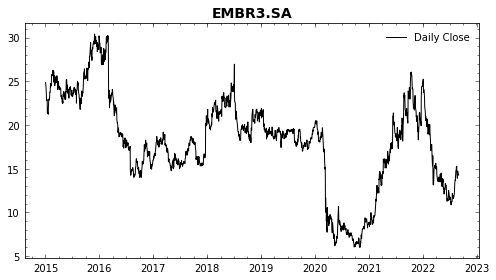

In [25]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(df,label='Daily Close')
ax.set_title('EMBR3.SA')
plt.legend()

plt.tight_layout()
plt.show()

Se você já é usuário de `Python` talvez tenha notado que não precisamos indicar os valores `x` e `y` do gráfico. Como nosso `DataFrame` `df` contêm um único valor e o índice é uma sequência de datas, o `matplotlib` entende tratar-se de uma série temporal e emprega automaticamente o índice como `x` do gráfico e os valores da Série de dados como `y`. Essa é apenas uma das vantagens de empregarmos esse formato. 

> **No formato de um DataFrame com um índice `datetime` e um único campo de valor o `matplotlib` entende tratar-se de uma série temporal e emprega automaticamente o índice como `x` do gráfico e os valores da Série de dados como `y`.**



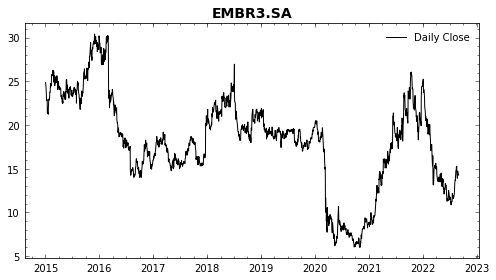

In [26]:
tspplot(ts=df,title='EMBR3.SA',label='Daily Close')

Empregaremos também uma função customizada do `plot()`, o `tspplot()`, para tornar o código mais simples e, novamente, você pode empregar a função padrão ou outra biblioteca de gráficos do `Python` sempre que quiser. 

## Manipulações de Séries Temporais
### `.diff() .shift() .cumsum()`

Existem algumas manipulações gerais de dados, como o tratamento de dados nulos ou a normalização de valores. Mas existem algumas manipulações de valores que são específicas e que só fazem sentido para Séries Temporais. 

A operação `.diff()` obtem a diferença entre um valor da série e o valor anterior, enquanto a funçao `.cumsum()` acumula no valor anterior (é operação inversa do `.diff()`). A operação `.shift(n)` faz a *defasagem* da série em $n$ intervalos de tempo.

In [27]:
df_diff = df.diff()
df_shift = df.shift()

df_diff_copy = df_diff.copy()
df_diff_copy.at[pd.to_datetime('2015-01-02'),'close'] = 24.85
df_cumsum = df_diff_copy.cumsum()

tspdisplay('df','df_diff','df_shift','df_cumsum')

df
                close
                     
2015-01-02  24.850000
2015-01-05  24.299999
2015-01-06  23.860001
2015-01-07  23.680000
2015-01-08  23.000000

df_diff
               close
                    
2015-01-02       NaN
2015-01-05 -0.550001
2015-01-06 -0.439999
2015-01-07 -0.180000
2015-01-08 -0.680000

df_shift
                close
                     
2015-01-02        NaN
2015-01-05  24.850000
2015-01-06  24.299999
2015-01-07  23.860001
2015-01-08  23.680000

df_cumsum
                close
                     
2015-01-02  24.850000
2015-01-05  24.299999
2015-01-06  23.860000
2015-01-07  23.680000
2015-01-08  23.000000

Essas operações serão bastante úteis mais adiante. Por hora, você pode entender o uso dessas transformações quando, por exemplo, estamos interessados não no valor das ações da EMBR3.SA, mas nas diferenças das cotações diárias, isto é, se a o valor da ação subiu ou desceu com relação ao dia anterior. Isto é exatamente a função `diff()` e essa série é representada no gráfico a seguir (gráfico da direita). 

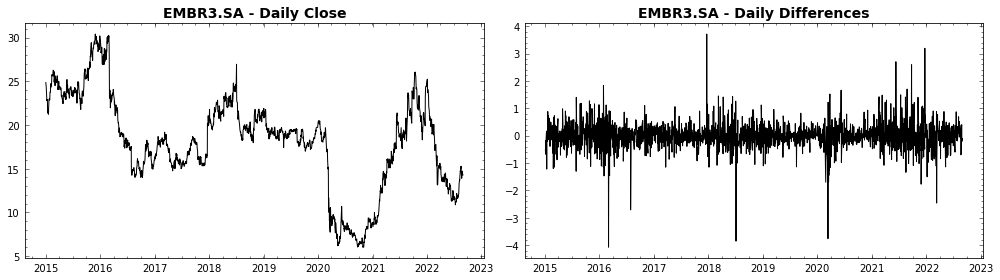

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

tspplot(df,title='EMBR3.SA - Daily Close',ax=ax[0])
tspplot(df.diff(),title='EMBR3.SA - Daily Differences',ax=ax[1])


## Reamostragem
### `.resample()`

Outra transformação útil e que só faz sentido para Séries Temporais é reamostrar os dados com uma frequencia diferente das amostras. Por exemplo, podemos reamostar nossa Série de dados dários da EMBR3.SA, para valores mensais da Série. 

df_monthly
                close
                     
2015-01-31  22.755238
2015-02-28  25.252778
2015-03-31  24.970909
2015-04-30  23.600000
2015-05-31  23.789000

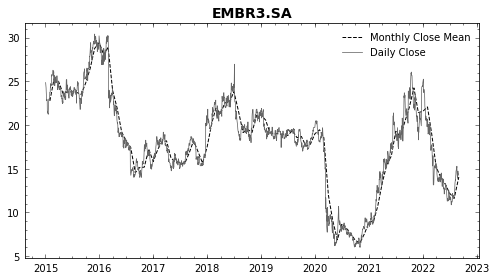

In [29]:
df_monthly = df.resample('M').mean()

fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',lw=1,ax=ax)
tspplot(df,title='EMBR3.SA',label='Daily Close',ax=ax,alpha=0.1,lw=0.75)

tspdisplay('df_monthly')

Igualmente podemos reamostra para vlores semanais, trimestrais ou anuais, assim como séries com frequecia de minutos podem ser reamostradas em horas ou dias. Aqui empregamos o valor médio do mês para a reamostragem, mas também poderíamos igualmente ter empregado o máximo, o mínimo ou a mediana.

## Médias Móveis
### `rolling(n)`
A ideia de médias móveis é obter uma *suavização* dos dados empregando um valor que é a média de uma *janela móvel* ao longo do tempo. Você aprenderá essa técnica em detalhe no próximo capítulo. Por hora basta você entender que, por exemplo, se você tem dados diários, você pode criar uma média móvel de 7d em que o primeiro valor é a média dos 7 primeiros dias, $avg[1:7]$, o próximo valor é média do segundo dia até o 8o dia, $avg[2:8]$, e assim sucessivamente, $avg[3:9]$, $avg[4:10]$, sempre em uma *janela* de tempo de 7 dias.

A seguir a série de dados da EMBR3.SA com média móvel trimestral e o gráfico com as médias móveis de 3 e 12 meses. 



df_monthly.rolling(3).mean()
                close
                     
2015-01-31        NaN
2015-02-28        NaN
2015-03-31  24.326308
2015-04-30  24.607896
2015-05-31  24.119970

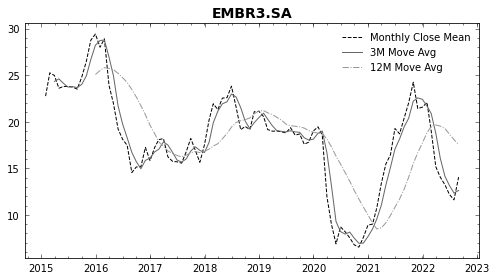

In [30]:
fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',ax=ax)
tspplot(df_monthly.rolling(3).mean(),title='EMBR3.SA',label='3M Move Avg',ax=ax,alpha=0.5)
tspplot(df_monthly.rolling(12).mean(),title='EMBR3.SA',label='12M Move Avg',linestyle='dashdot',ax=ax,alpha=0.5)

tspdisplay('df_monthly.rolling(3).mean()')

## Decomposição
### `seasonal_decompose()`, `tspdecompose()`
Um aspecto importante na anális de Séries Temporais é a sua decomposição. Existem 3 componentes principais, a tendência, a sazonalidade e os resíduos. Como você verá mais adiante, boa parte deste capítulo trata exatamente sobre essa decomposição. Para obter as componentes de uma Série Temporal vamos empregar a biblioteca `statsmodel`. Essa biblioteca traz uma série de funções estatísticas e modelos de séries temporais, e vamos empregar muito ela nos capítulos seguintes. A função  `seasonal_decompose()` permite facilmente observar as componentes de uma Série de dados e, do mesmo modo que antes, muitas vezes vamos empregar nosso função customizada para isso `tspdecompose()`.

In [31]:
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

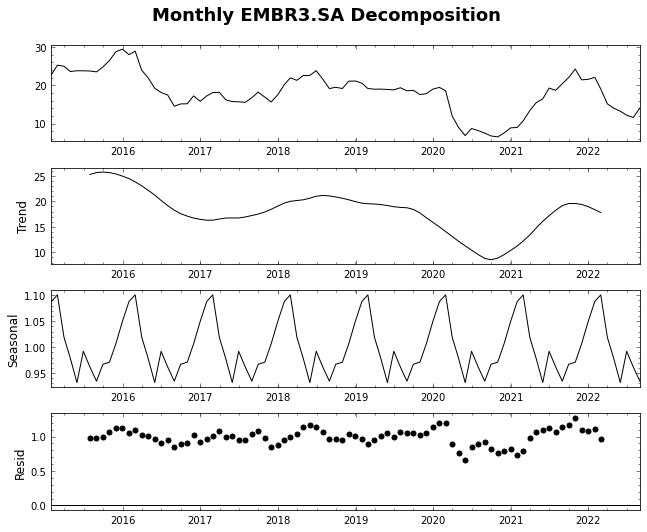

In [32]:
tspdecompose(df_monthly,title='Monthly EMBR3.SA Decomposition')

## Intervalo de Confiança

Um ponto importante ao se fazer previsões é o de observarmos o *intervalo de confiança*, *IC*, dos valores previstos. Mesmo no ajuste da série os valores obtidos estão sujeitos a um intervalo de confiança. Por exemplo, se para quaisquer anos os valores do mês de Jan de uma série mensal apresenta sempre o mesmo valor, você terá mais certeza sobre a sua estimativa do que se esse valor tiver vários diferentes valores, com uma variação (variância ou desvio padrão) muito grande. Assim, a variância (ou seu par, o desvio padrão) dos valores empregados para a sua estimativa, são um bom indicativo do intervalo de confiança da sua previsão. 

Aqui, podemos empregar o desvio padrão para estimar o intervalo de confiança. Ele vai indicar o intervalo em torno do qual estimamos encontrar os valores com uma probabilidade de 95% (esse é o valor usualmente empregado embora possamos usar outros). Assim, você vai obter um intervalo de confiança maior ao longo do ajuste para intervalos de tempo com maior variação dos valores e, intervalos menores, quando a quantidade de valores diferentes (a variação) for menor. 

### IC das Previsões

Enquanto o IC do ajuste pode ser obtido apenas empregando-se os dados utilizados na estimativa da curva ajustada (para cada ponto, menos valores indicando um intervalo de confiança menor e, portanto, uma previsão melhor), para valores futuros não há um desvio padrão dos dados empregados. 

A ideia aqui é, então, estimarmos o intervalo do mesmo modo que estimamos os valores. Novamente existem diferentes técnicas que podem ser empregadas. Mas para os nossos propósitos é suficiente você entender que a cada novo período de previsão o intervalo de erro aumenta! Vamos entender isso: se você faz uma previsão para o período $t+1$ que já tem um erro, a previsão de mais um período $t+2$, sendo dependente do valor do período anterior estimado tende a aumentar o erro da previsão seguinte e assim sucessivamente. É o que chamamos de *propagação do erro*. Assim o IC, ou a *margem de erro*, aumenta a medida que nos distanciamos do período da série original. Uma forma comum de estimarmos esse intervalo adicionarmos, a cada novo período, um intervalo de mesmo tamanho do intervalo de erro anterior.





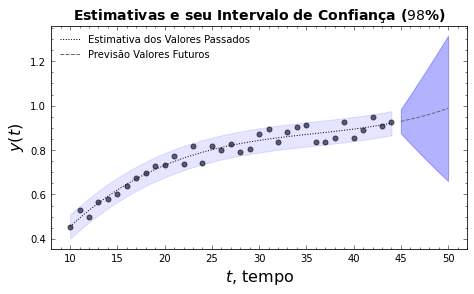

In [68]:
import statsmodels.formula.api as sm

np.random.seed(1)
df = pd.DataFrame()

start = 10; end = 45; forecast_len = 5
df['t'] = np.arange(start,end,1) 
df['y'] = 1 - np.sin(2 * np.pi / df.t) + np.random.sample(len(df))/10

z = np.polyfit(df.t, df.y, 3)
p = np.poly1d(z)

forecast = pd.DataFrame()
forecast['t'] = np.arange(end,end + forecast_len + 1,1)
forecast['y_hat'] = p(np.arange(end,end + forecast_len + 1,1))

df['y_hat'] = p(df.t)
df['residuo'] = df['y'] - df['y_hat']

RMSFE = np.sqrt(sum([x**2 for x in df['residuo']]) / len(df['residuo']))
band_size = 1.96*RMSFE 
# 1.96, corresponde a um intervalo de confiança de 95%
# ver https://otexts.com/fpp2/prediction-intervals.html

forecast['step'] = np.arange(1,len(forecast)+1)
forecast['band_size'] = forecast['step'] * band_size 

plt.scatter(df.t,df.y,alpha=0.6)
plt.plot(df.t, df.y_hat, linestyle=':',label='Estimativa dos Valores Passados')
plt.fill_between(df.t, (df['y_hat']-band_size), (df['y_hat']+band_size), color='b', alpha=.1)

plt.plot(forecast.t, forecast.y_hat, linestyle='--',label='Previsão Valores Futuros')
plt.fill_between(forecast.t, (forecast['y_hat']-forecast['band_size']), (forecast['y_hat']+forecast['band_size']), color='b', alpha=.3)

plt.title('Estimativas e seu Intervalo de Confiança ($98$%)', fontsize=14, weight='bold')
plt.xlabel('$t$, tempo', fontsize=16)
plt.ylabel('$y(t)$', fontsize=16)
plt.legend(loc='upper left')
plt.show()

Como você pode ver as estimativas ficam, a cada período com mais incerteza, o que é o esperado. É, de qualquer modo, um análise essencial ao fazermos previsões. 

# Para Saber Mais

Para uma introdução ao uso dos pacotes `Pandas` e `Matplotlib` acesse: 

* Jake VanderPlas. **Python Data Science Handbook** O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. 

Há também na seção *Working with Time Series* que pode ser uma introdução alternativa à manipulação de dados de Séries Temporais e o uso de datas com `Python`.

<br>

Acesse também a documentação oficial das bibliotecas empregadas. Lá você vai poder encontrar uma série de tutoriais, exemplos e a documentação completa dos pacotes.

* `Pandas`, https://pandas.pydata.org/ 

* `Matplotlib`, https://matplotlib.org 

* `Statsmodel` https://statsmodels.org


